In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.__version__)

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    result = np.zeros((len(sequences), dimension), dtype=np.float)
    for i, word_indices in enumerate(sequences):
        result[i, word_indices] = 1.0
    return result

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
train_data = multi_hot_sequences(train_data, NUM_WORDS)
test_data = multi_hot_sequences(test_data, NUM_WORDS)

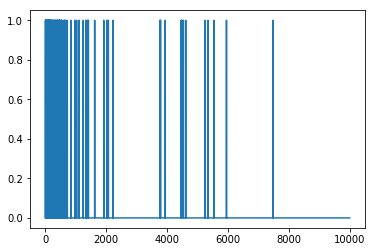

In [5]:
plt.plot(train_data[0])

In [6]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, tf.nn.relu),
    keras.layers.Dense(1, tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                  train_labels,
                  epochs=20,
                  batch_size=512,
                  validation_data=(test_data, test_labels),
                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.4931 - acc: 0.7893 - binary_crossentropy: 0.4931 - val_loss: 0.3329 - val_acc: 0.8796 - val_binary_crossentropy: 0.3329
Epoch 2/20
 - 3s - loss: 0.2465 - acc: 0.9122 - binary_crossentropy: 0.2465 - val_loss: 0.2834 - val_acc: 0.8878 - val_binary_crossentropy: 0.2834
Epoch 3/20
 - 3s - loss: 0.1804 - acc: 0.9380 - binary_crossentropy: 0.1804 - val_loss: 0.2892 - val_acc: 0.8845 - val_binary_crossentropy: 0.2892
Epoch 4/20
 - 3s - loss: 0.1454 - acc: 0.9510 - binary_crossentropy: 0.1454 - val_loss: 0.3139 - val_acc: 0.8792 - val_binary_crossentropy: 0.3139
Epoch 5/20
 - 4s - loss: 0.1216 - acc: 0.9601 - binary_crossentropy: 0.1216 - val_loss: 0.3387 - val_acc: 0.8741 - val_binary_crossentropy: 0.3387
Epoch 6/20
 - 3s - loss: 0.1017 - acc: 0.9688 - binary_crossentropy: 0.1017 - val_loss: 0.3683 - val_acc: 0.8702 - val_binary_crossentropy: 0.3683
Epoch 7/20
 - 3s - loss: 0.0859 - acc: 0.9747 - binary_crossentropy:

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, tf.nn.relu),
    keras.layers.Dense(1)
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.8509 - acc: 0.5966 - binary_crossentropy: 0.8509 - val_loss: 0.5573 - val_acc: 0.7043 - val_binary_crossentropy: 0.5573
Epoch 2/20
 - 2s - loss: 0.4416 - acc: 0.8040 - binary_crossentropy: 0.4416 - val_loss: 0.4211 - val_acc: 0.8212 - val_binary_crossentropy: 0.4211
Epoch 3/20
 - 2s - loss: 0.3260 - acc: 0.8638 - binary_crossentropy: 0.3260 - val_loss: 0.3622 - val_acc: 0.8437 - val_binary_crossentropy: 0.3622
Epoch 4/20
 - 2s - loss: 0.2615 - acc: 0.8694 - binary_crossentropy: 0.2615 - val_loss: 0.3539 - val_acc: 0.8405 - val_binary_crossentropy: 0.3539
Epoch 5/20
 - 2s - loss: 0.2231 - acc: 0.8630 - binary_crossentropy: 0.2231 - val_loss: 0.3933 - val_acc: 0.8294 - val_binary_crossentropy: 0.3933
Epoch 6/20
 - 2s - loss: 0.1955 - acc: 0.8512 - binary_crossentropy: 0.1955 - val_loss: 0.4121 - val_acc: 0.8158 - val_binary_crossentropy: 0.4121
Epoch 7/20
 - 2s - loss: 0.1726 - acc: 0.8365 - binary_crossentropy:

In [10]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, tf.nn.relu),
    keras.layers.Dense(1)
])

bigger_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 15s - loss: 5.6011 - acc: 0.2544 - binary_crossentropy: 5.6011 - val_loss: 0.5168 - val_acc: 0.7168 - val_binary_crossentropy: 0.5168
Epoch 2/20
 - 14s - loss: 0.4442 - acc: 0.7426 - binary_crossentropy: 0.4442 - val_loss: 0.4410 - val_acc: 0.7485 - val_binary_crossentropy: 0.4410
Epoch 3/20
 - 15s - loss: 0.3080 - acc: 0.7270 - binary_crossentropy: 0.3080 - val_loss: 1.0318 - val_acc: 0.6295 - val_binary_crossentropy: 1.0318
Epoch 4/20
 - 15s - loss: 0.2713 - acc: 0.7137 - binary_crossentropy: 0.2713 - val_loss: 0.6929 - val_acc: 0.6644 - val_binary_crossentropy: 0.6929
Epoch 5/20
 - 15s - loss: 0.1499 - acc: 0.6470 - binary_crossentropy: 0.1499 - val_loss: 0.8323 - val_acc: 0.5688 - val_binary_crossentropy: 0.8323
Epoch 6/20
 - 14s - loss: 0.1091 - acc: 0.4943 - binary_crossentropy: 0.1091 - val_loss: 0.9925 - val_acc: 0.4784 - val_binary_crossentropy: 0.9925
Epoch 7/20
 - 15s - loss: 0.0991 - acc: 0.4030 - binary_crosse

In [12]:
def plot_histories(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label = name.title() + ' Val')
        plt.plot(history.epoch, history.history[key], label=name.title() + ' Train', color=val[0].get_color())
        
    plt.xlabel("Epochs")
    plt.ylabel(key.replace("_", " ").title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])

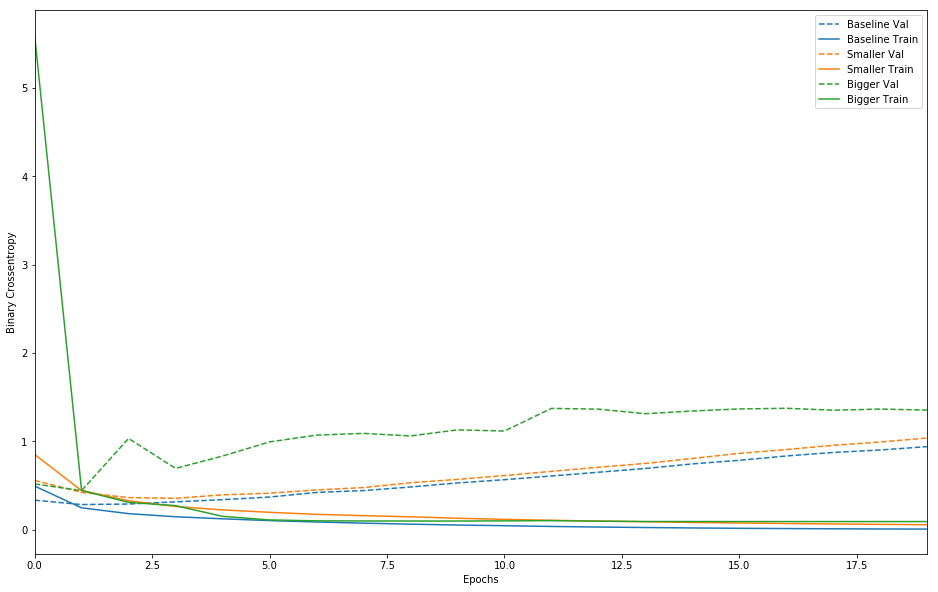

In [13]:
plot_histories([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [22]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, 
                       activation=tf.nn.relu, 
                       input_shape=(NUM_WORDS,), 
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(16,
                      activation=tf.nn.relu,
                      kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2_history = l2_model.fit(train_data, train_labels,
                         epochs=20,
                         validation_data=(test_data, test_labels),
                         verbose=2,
                         batch_size=512)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5777 - acc: 0.7943 - binary_crossentropy: 0.5389 - val_loss: 0.4438 - val_acc: 0.8658 - val_binary_crossentropy: 0.4029
Epoch 2/20
 - 3s - loss: 0.3560 - acc: 0.8952 - binary_crossentropy: 0.3084 - val_loss: 0.3582 - val_acc: 0.8822 - val_binary_crossentropy: 0.3055
Epoch 3/20
 - 3s - loss: 0.2902 - acc: 0.9167 - binary_crossentropy: 0.2343 - val_loss: 0.3429 - val_acc: 0.8860 - val_binary_crossentropy: 0.2848
Epoch 4/20
 - 3s - loss: 0.2623 - acc: 0.9287 - binary_crossentropy: 0.2026 - val_loss: 0.3481 - val_acc: 0.8844 - val_binary_crossentropy: 0.2874
Epoch 5/20
 - 3s - loss: 0.2456 - acc: 0.9355 - binary_crossentropy: 0.1838 - val_loss: 0.3511 - val_acc: 0.8838 - val_binary_crossentropy: 0.2889
Epoch 6/20
 - 3s - loss: 0.2332 - acc: 0.9413 - binary_crossentropy: 0.1701 - val_loss: 0.3591 - val_acc: 0.8804 - val_binary_crossentropy: 0.2957
Epoch 7/20
 - 3s - loss: 0.2230 - acc: 0.9464 - binary_crossentropy:

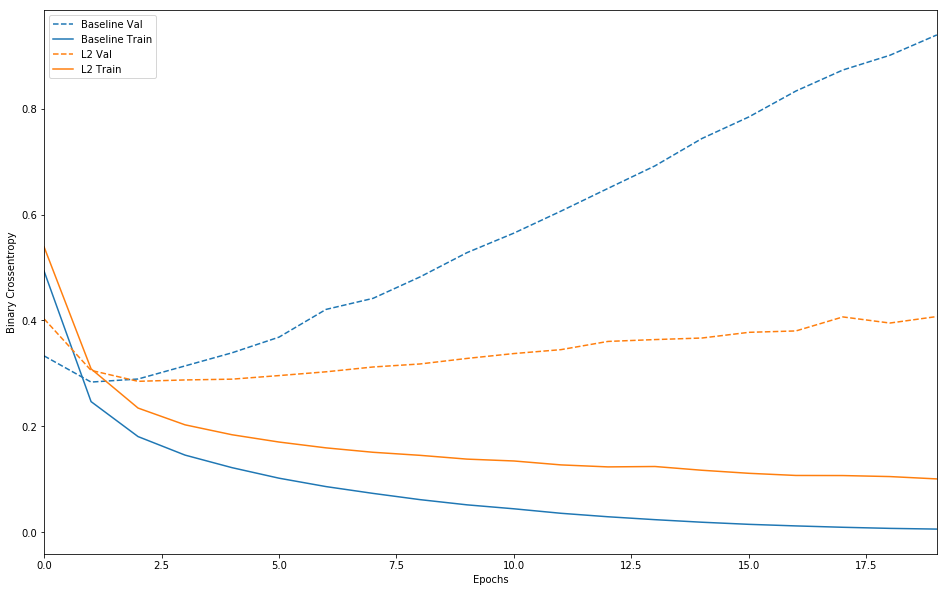

In [26]:
plot_histories([('baseline', baseline_history),
               ('l2', l2_history)])

In [29]:
dpt_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

dpt_history = dpt_model.fit(train_data, train_labels,
             epochs=20,
             verbose=2,
             batch_size=512,
             validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6254 - acc: 0.6363 - binary_crossentropy: 0.6254 - val_loss: 0.5017 - val_acc: 0.8480 - val_binary_crossentropy: 0.5017
Epoch 2/20
 - 3s - loss: 0.4752 - acc: 0.7844 - binary_crossentropy: 0.4752 - val_loss: 0.3625 - val_acc: 0.8804 - val_binary_crossentropy: 0.3625
Epoch 3/20
 - 3s - loss: 0.3702 - acc: 0.8637 - binary_crossentropy: 0.3702 - val_loss: 0.3029 - val_acc: 0.8878 - val_binary_crossentropy: 0.3029
Epoch 4/20
 - 3s - loss: 0.3031 - acc: 0.9051 - binary_crossentropy: 0.3031 - val_loss: 0.2835 - val_acc: 0.8886 - val_binary_crossentropy: 0.2835
Epoch 5/20
 - 3s - loss: 0.2540 - acc: 0.9222 - binary_crossentropy: 0.2540 - val_loss: 0.2819 - val_acc: 0.8881 - val_binary_crossentropy: 0.2819
Epoch 6/20
 - 3s - loss: 0.2185 - acc: 0.9348 - binary_crossentropy: 0.2185 - val_loss: 0.2895 - val_acc: 0.8848 - val_binary_crossentropy: 0.2895
Epoch 7/20
 - 3s - loss: 0.1858 - acc: 0.9446 - binary_crossentropy:

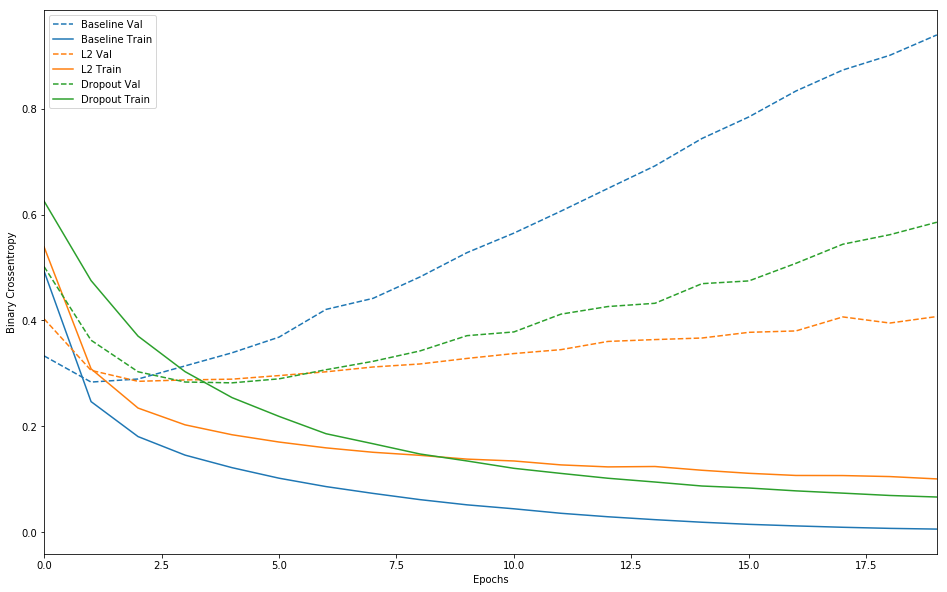

In [30]:
plot_histories([('baseline', baseline_history),
               ('l2', l2_history),
               ('Dropout', dpt_history)])